# 第七周作业答案

参考资料https://zhuanlan.zhihu.com/p/41993542

### 参考：2019202091-徐克丰

# 第一题
## 问题描述
使用Adevrtising数据中的三个自变量(newpaper,TV和Radio)建立三个一元回归模型，将一元回归的散点图——趋势线画出来
## 代码实现

tv与sales建立的一元回归方程为：sales=0.048*TV+7.033
newspaper与sales建立的一元回归方程为：slaes=0.055*newspaper+12.351
radio与sales建立的一元回归方程为：sales=0.202*radio+9.312


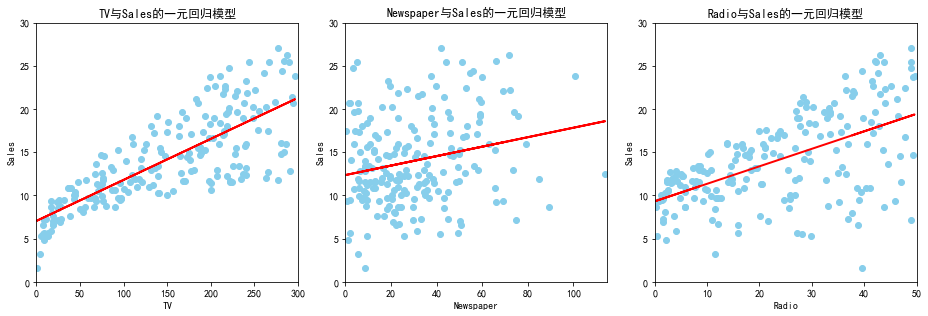

In [1]:
#建立一元回归模型
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签

#读取数据,分开每一列
df=pd.read_excel('Advertising.xlsx')
sales=df.loc[:,['Sales']].values  
tv=df.loc[:,['TV']].values
newspaper=df.loc[:,['Newspaper']].values
radio=df.loc[:,['Radio']].values
X=df.loc[:,['TV','Radio','Newspaper']].values
#建立tv与sales的一元回归模型
slr=LinearRegression() #生成一个一元回归对象
slr.fit(tv,sales)
#print(slr.coef_[0])
#print(slr.intercept_)
print('tv与sales建立的一元回归方程为：sales=%.3f*TV+%.3f'%(slr.coef_[0],slr.intercept_))
plt.figure(figsize=(13,4.5))
plt.subplot(131)
plt.scatter(tv,sales,color='skyblue')
plt.plot(tv,slr.predict(tv),color='red',linewidth=2)
plt.xlim([0,300])
plt.ylim([0,30])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV与Sales的一元回归模型')

#建立newspaper与sales的一元回归模型
slr=LinearRegression() #生成一个一元回归对象
slr.fit(newspaper,sales)
print('newspaper与sales建立的一元回归方程为：slaes=%.3f*newspaper+%.3f'%(slr.coef_[0],slr.intercept_))
plt.subplot(132)
plt.scatter(newspaper,sales,color='skyblue')
plt.plot(newspaper,slr.predict(newspaper),color='red',linewidth=2)
plt.xlim([0,115])
plt.ylim([0,30])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper与Sales的一元回归模型')

#建立radio与sales的一元回归模型
slr=LinearRegression() #生成一个一元回归对象
slr.fit(radio,sales)
print('radio与sales建立的一元回归方程为：sales=%.3f*radio+%.3f'%(slr.coef_[0],slr.intercept_))
plt.subplot(133)
plt.scatter(radio,sales,color='skyblue')
plt.plot(radio,slr.predict(radio),color='red',linewidth=2)
plt.xlim([0,50])
plt.ylim([0,30])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio与Sales的一元回归模型')

plt.tight_layout()

# 第二题
## 问题描述
使用Adevrtising数据中的三个自变量(newpaper,TV和Radio)建立一个最小二乘法计算的多元回归模型
## 代码实现

In [2]:
#建立多元回归模型
slr.fit(X,sales)
coef=slr.coef_.reshape(3,1)
print('建立的多元回归模型为y=%.3f*TV+%.3f*Radio%.3f*newspaper+%.3f'%(coef[0],coef[1],coef[2],slr.intercept_))

建立的多元回归模型为y=0.046*TV+0.189*Radio-0.001*newspaper+2.939


# 第三题 
## 问题描述
使用Adevrtising数据中的三个自变量(newpaper,TV和Radio)建立一个$Successive\ Orthogonaliaztion$算法的多元回归模型

比较并讨论以上三种类结果。分析为什么原因。

In [ ]:
#逐步正交算法求解回归系数
#求解向量内积
def CalVecMul(a,b):
    sum=0
    for i in range(len(a)):
        sum+=a[i]*b[i]
    return sum
#SO算法的求解,X是3行矩阵，需要在原来基础上转置
def OSalg(X,y):  
    z=np.array([list(X[0])])   #第1项由1构成
    for j in [1,2,3]:
        sum0=np.array(list(np.zeros(len(y))))  #用来求线性组合
        for k in range(j):
            vector=(np.dot(X[j],z[k])/np.dot(z[k],z[k]))*z[k] 
            sum0+=vector
        z=np.append(z,np.array([list(X[j]-sum0)]),axis=0)
    return np.dot(y.reshape(200),z[3])/np.dot(z[3],z[3])

#求解Newspaper的系数,在最前面添加1列1
X1=np.c_[np.ones(200),X].T
b3=OSalg(X1,sales)
#求解Radio的系数
X2=df.loc[:,['TV','Newspaper','Radio']].values
X2=np.c_[np.ones(200),X2].T
b2=OSalg(X2,sales)
#求解TV的系数
X3=df.loc[:,['Newspaper','Radio','TV']].values
X3=np.c_[np.ones(200),X3].T
b1=OSalg(X3,sales)
#求解常数项
X4=np.c_[X,np.ones(200)].T
a=OSalg(X4,sales)
print('依据SO算法建立的多元回归模型为y=%.3f*TV+%.3f*Radio%.3f*newspaper+%.3f'%(b1,b2,b3,a))

 #### 结果分析
 计算发现三个一元回归的结果不同于后面两个多元回归，而以最小二乘法和SO算法得出的回归方程是一致的。从一元回归与多元回归Newspaper系数的差异(0.055和-0.001)来看，一元回归中Newspaper对Sales造成的影响在多元回归中被TV,Radio对Sales造成的影响替代了，说明Newspaper与另外两个变量之间存在一定的相关关系。而另一方面，可以发现，通过最小二乘回归计算出的多元回归系数与通过逐步正交回归(Successive Orthogonalization)得到的回归系数完全一致，因此这两种方法是等效的，即多元回归中，某一自变量的回归系数可以解释为在排除其他自变量对因变量的影响后该自变量仍然能够对因变量产生的影响。

## 第三题
### 参考2018200222-查王皓天

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt=pd.read_excel('Advertising.xlsx')

#数据
Sales0=np.mat(dt['Sales']).T
TV0=np.mat(dt['TV']).T
Radio0=np.mat(dt['Radio']).T
Newspaper0=np.mat(dt['Newspaper']).T

#求均值
Sales_mean=np.mean(Sales0)
TV_mean=np.mean(TV0)
Radio_mean=np.mean(Radio0)
Newspaper_mean=np.mean(Newspaper0)

#减均值
TV=TV0-TV_mean
Sales=Sales0-Sales_mean
Radio=Radio0-Radio_mean
Newspaper=Newspaper0-Newspaper_mean


#令Z0=X0=1，作回归
Z0=np.mat(np.ones((200,1)))
b0=np.mean(Sales)

#把TV回归到1上
a1=(Z0.T*TV)/(Z0.T*Z0)


#Z1
Z1=TV-float(a1)*Z0
b1=(Z1.T*Sales)/(Z1.T*Z1)

#把Radio回归到1，Z1上
a1=(Z0.T*Radio)/(Z0.T*Z0)
a2=(Z1.T*Radio)/(Z1.T*Z1)

#Z2
Z2=Radio-float(a1)*Z0-float(a2)*Z1
b2=(Z2.T*Sales)/(Z2.T*Z2)

#把Newspaper回归到Z0,Z1,Z2上
a1=(Z0.T*Newspaper)/(Z0.T*Z0)
a2=(Z1.T*Newspaper)/(Z1.T*Z1)
a3=(Z2.T*Newspaper)/(Z2.T*Z2)

#Z3
Z3=Newspaper-float(a1)*Z0-float(a2)*Z1-float(a3)*Z2
b3=(Z3.T*Sales)/(Z3.T*Z3)



print("SO模型是：")
print("Sales="+str(float('%.3f' % b0))+"+"+str(float('%.3f' % b1))+"*TV+"+str(float('%.3f' % b2))+"*Radio"
     +str(float('%.3f' % b3))+"*Newspaper")

SO模型是：
Sales=-0.0+0.048*TV+0.188*Radio-0.001*Newspaper


In [6]:
#计算相关矩阵
x=[np.array(dt['TV']),np.array(dt['Radio']),np.array(dt['Newspaper'])]
res=np.corrcoef(x)
print('相关系数矩阵为：\n',res)

相关系数矩阵为：
 [[1.         0.05480866 0.05664787]
 [0.05480866 1.         0.35410375]
 [0.05664787 0.35410375 1.        ]]


## Discussion

通过上面三种算法，我们看到输出的值各不相同

这与我们如何解释回归系数有着重要关系。如果我们用第三种方式，回归系数则是排除了前面变量的影响后的<font face="宋体" color=red size=3>净效果</font>，如果采用第二种方程，则是每个变量单独的影响。如果变量之间都是正交的，那么这两种解释方式是等同的，但通过上面的相关矩阵我们发现，radio和newspaper有着比较高的正相关，所以系数也会有所不同

而第一种回归则是认为只考虑一个因素的影响，可能产生遗漏变量偏误，如果遗漏的变量还和现存变量相关，就会影响无偏性